In [ ]:
!pip install mlens

In [ ]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# balance data
from imblearn.over_sampling import BorderlineSMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
#from collections import Sequence
#from mlens.ensemble import SuperLearner
from sklearn.neural_network import MLPClassifier

# evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score,auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [ ]:
!pip install --upgrade mlens


In [ ]:
from collections.abc import Sequence
#from mlens.ensemble import SuperLearner
#from mlens.ensemble import SuperLearner


In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**Outlier Detection**

In [ ]:
#Outlier Detection

In [ ]:
data=data.drop(labels=['customerID'],axis=1)

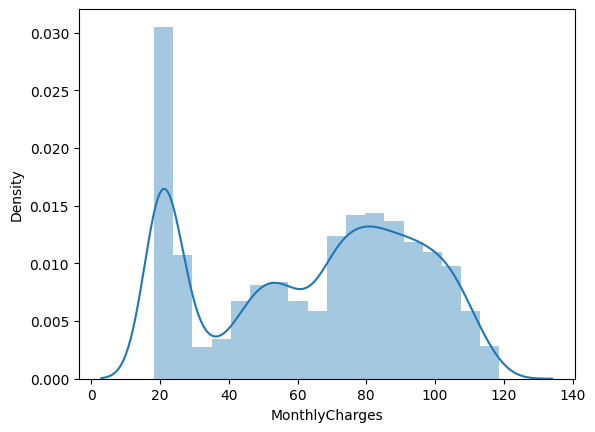

In [ ]:
sns.distplot(data.MonthlyCharges);

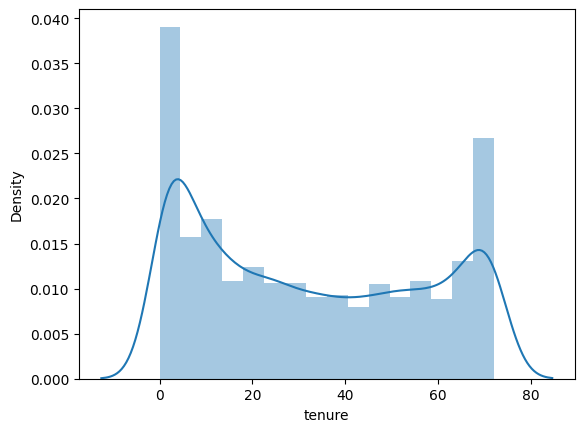

In [ ]:
sns.distplot(data.tenure);

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [ ]:
detect_outliers(['tenure', 'MonthlyCharges', 'TotalCharges']) #No outlier

*** tenure outlier points*** 
 Series([], Name: tenure, dtype: int64) 

*** MonthlyCharges outlier points*** 
 Series([], Name: MonthlyCharges, dtype: float64) 

*** TotalCharges outlier points*** 
 Series([], Name: TotalCharges, dtype: float64) 



**Encoding the Categorical Features**

In [ ]:
#Categorical Variables Encoding(Target Encoding)

In [ ]:
data['Churn'] = data['Churn'].map({'Yes':1,'No':0})

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [ ]:
def category(df):
    for var in categorical:
        ordered_labels = df.groupby([var])['Churn'].mean().sort_values().index

        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)}
        ordinal_label
        df[var] = df[var].map(ordinal_label)

category(data)

In [ ]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,0,1,2,1,2,2,2,2,2,1,3,29.85,29.85,0
1,0,0,1,1,34,1,1,1,1,2,1,2,2,2,1,0,2,56.95,1889.50,0
2,0,0,1,1,2,1,1,1,1,1,2,2,2,2,2,1,2,53.85,108.15,1
3,0,0,1,1,45,0,0,1,1,2,1,1,2,2,1,0,1,42.30,1840.75,0
4,1,0,1,1,2,1,1,2,2,2,2,2,2,2,2,1,3,70.70,151.65,1


**Data Splitting**

In [ ]:
#Data Splitting for Model Preparation

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import BorderlineSMOTE

X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Handle missing values using SimpleImputer (replace NaN values with the mean)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((9313, 19), (1035, 19))

**Model Building**

In [ ]:
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [ ]:
LR_S = LogisticRegression(random_state = 42)
params_LR = {'C': list(np.arange(1,12)), 'penalty': ['l2', 'elasticnet', 'none'], 'class_weight': ['balanced','None']}
grid_LR = RandomizedSearchCV(LR_S, param_distributions=params_LR, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_LR.fit(X_train, y_train)
print('Best parameters:', grid_LR.best_estimator_)

Best parameters: LogisticRegression(C=11, class_weight='balanced', penalty='none',
                   random_state=42)


In [ ]:
LR = LogisticRegression(random_state = 42, penalty= 'l2', class_weight= 'balanced', C=6)
cross_val_LR_Acc = cross_val_score(LR, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_LR_f1 = cross_val_score(LR, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_LR_AUC = cross_val_score(LR, X_train, y_train, cv = CV, scoring = 'roc_auc')

In [ ]:
RF_S = RandomForestClassifier(random_state = 42)
params_RF = {'n_estimators': list(range(50,100)), 'min_samples_leaf': list(range(1,5)), 'min_samples_split': list(range(1,5))}
grid_RF = RandomizedSearchCV(RF_S, param_distributions=params_RF, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_RF.fit(X_train, y_train)
print('Best parameters:', grid_RF.best_estimator_)

Best parameters: RandomForestClassifier(min_samples_leaf=2, n_estimators=86, random_state=42)


In [ ]:
RF = RandomForestClassifier(n_estimators=70, random_state=42)
cross_val_RF_Acc = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_RF_f1 = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_RF_AUC = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'roc_auc')

In [ ]:
KNN_S = KNeighborsClassifier()
params_KNN = {'n_neighbors': list(range(1,20))}
grid_KNN = RandomizedSearchCV(KNN_S, param_distributions=params_KNN, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_KNN.fit(X_train, y_train)
print('Best parameters:', grid_KNN.best_estimator_)

Best parameters: KNeighborsClassifier(n_neighbors=1)


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=1)
cross_val_KNN_Acc = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_KNN_f1 = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_KNN_AUC = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'roc_auc')

In [ ]:
DT_S = DecisionTreeClassifier(random_state=42)
params_DT = {'min_samples_leaf': list(range(1,6)), 'min_samples_split': list(range(1,6))}
grid_DT = RandomizedSearchCV(DT_S, param_distributions=params_DT, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_DT.fit(X_train, y_train)
print('Best parameters:', grid_DT.best_estimator_)

Best parameters: DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=4, random_state=42)


In [ ]:
DT = DecisionTreeClassifier(random_state=42)
cross_val_DT_Acc = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_DT_f1 = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_DT_AUC = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'roc_auc')

In [ ]:
AB_S = AdaBoostClassifier(random_state=42)
params_AB = {'n_estimators': list(np.arange(50,100,10)), 'learning_rate':[0.01, 0.1, 1]}
grid_AB = RandomizedSearchCV(AB_S, param_distributions=params_AB, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_AB.fit(X_train, y_train)
print('Best parameters:', grid_AB.best_estimator_)

Best parameters: AdaBoostClassifier(learning_rate=1, n_estimators=90, random_state=42)


In [ ]:
AB = AdaBoostClassifier(learning_rate=1, n_estimators=90, random_state=42)
cross_val_AB_Acc = cross_val_score(AB, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_AB_f1 = cross_val_score(AB, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_AB_AUC = cross_val_score(AB, X_train, y_train, cv = CV, scoring = 'roc_auc')

In [ ]:
XG_S = XGBClassifier(random_state=42)
params_XG = {'n_estimators': list(np.arange(50,150,10)), 'learning_rate':[0.01, 0.1, 1]}
grid_XG = RandomizedSearchCV(XG_S, param_distributions=params_XG, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_XG.fit(X_train, y_train)
print('Best parameters:', grid_XG.best_estimator_)

Best parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [ ]:
XG = XGBClassifier(learning_rate=1, n_estimators=120, random_state=42)
cross_val_XG_Acc = cross_val_score(XG, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_XG_f1 = cross_val_score(XG, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_XG_AUC = cross_val_score(XG, X_train, y_train, cv = CV, scoring = 'roc_auc')

In [ ]:
estimators = [('DT', DT),
              ('RF', RF),
              ('LR', LR),
              ('KNN', KNN),
              ('XG', XG),
              ('AB', AB)]

Stack = StackingClassifier(estimators = estimators, final_estimator = MLPClassifier())

In [ ]:
cross_val_ST_Acc = cross_val_score(Stack, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_ST_f1 = cross_val_score(Stack, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_ST_AUC = cross_val_score(Stack, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Feature Importance**

In [ ]:
#Feature Importance

In [ ]:
RF_I = RandomForestClassifier(n_estimators=70, random_state=42)
RF_I.fit(X, y)

RandomForestClassifier(n_estimators=70, random_state=42)

In [ ]:
# Create a DataFrame with numerical column names
X_train_df = pd.DataFrame(X_train, columns=[f'feature{i}' for i in range(X_train.shape[1])])

# Now you can use X_train_df.columns
d = {'Features': X_train_df.columns, 'Feature Importance': RF_I.feature_importances_}
df = pd.DataFrame(d)
df_sorted = df.sort_values(by='Feature Importance', ascending=True)
df_sorted

,Features,Feature Importance
5,feature5,0.005028
12,feature12,0.016864
13,feature13,0.017642
1,feature1,0.019351
6,feature6,0.022475
0,feature0,0.026485
2,feature2,0.027821
3,feature3,0.029450
15,feature15,0.031269
7,feature7,0.032652


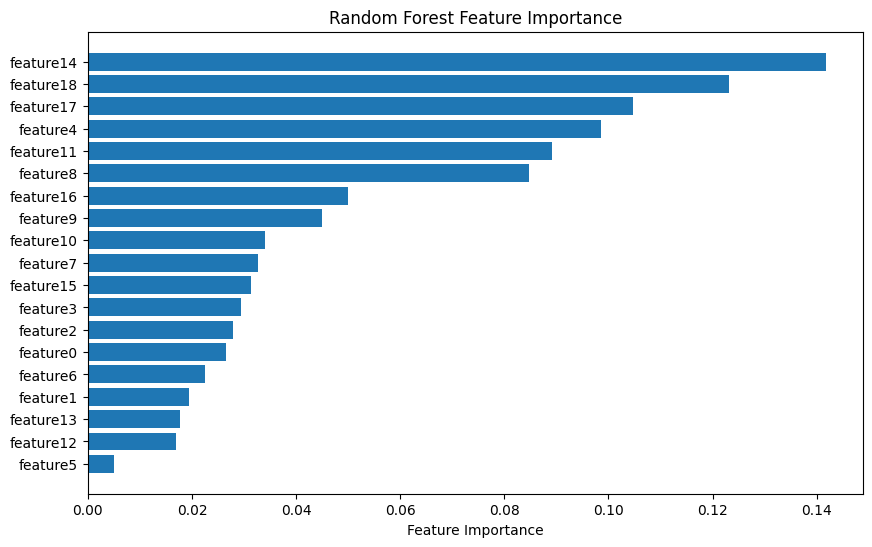

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already imported X_train and RF_I
# Replace this with your actual data and feature importances

# Create a DataFrame with numerical column names
X_train_df = pd.DataFrame(X_train, columns=[f'feature{i}' for i in range(X_train.shape[1])])

# Assuming you have a trained Random Forest model stored in RF_I

# Now you can use X_train_df.columns
d = {'Features': X_train_df.columns, 'Feature Importance': RF_I.feature_importances_}
df = pd.DataFrame(d)

# Sort the DataFrame by 'Feature Importance'
df_sorted = df.sort_values(by='Feature Importance', ascending=True)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Features'], df_sorted['Feature Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


**ModelEvaluation**

In [ ]:
compare_models = [('Logistic Regression', cross_val_LR_Acc.mean(),cross_val_LR_f1.mean(),cross_val_LR_AUC.mean()),
                  ('Random Forest', cross_val_RF_Acc.mean(),cross_val_RF_f1.mean(),cross_val_RF_AUC.mean()),
                  ('KNN', cross_val_KNN_Acc.mean(),cross_val_KNN_f1.mean(),cross_val_KNN_AUC.mean()),
                  ('Decision Tree', cross_val_DT_Acc.mean(), cross_val_DT_f1.mean(),cross_val_DT_AUC.mean()),
                  ('Ada Boost', cross_val_AB_Acc.mean(), cross_val_AB_f1.mean(),cross_val_AB_AUC.mean()),
                  ('XG Boost', cross_val_XG_Acc.mean(), cross_val_XG_f1.mean(),cross_val_XG_AUC.mean()),
                  ('Stacking', cross_val_ST_Acc.mean(), cross_val_ST_f1.mean(),cross_val_ST_AUC.mean())]

In [ ]:
compare = pd.DataFrame(data = compare_models, columns=['Model','Accuracy Mean', 'F1 Score Mean', 'AUC Score Mean'])
compare.style.background_gradient(cmap='YlGn')

,Model,Accuracy Mean,F1 Score Mean,AUC Score Mean
0,Logistic Regression,0.750561,0.769941,0.820525
1,Random Forest,0.857621,0.853320,0.934954
2,KNN,0.785674,0.798032,0.785845
3,Decision Tree,0.807586,0.806255,0.808546
4,Ada Boost,0.854506,0.855512,0.940120
5,XG Boost,0.832922,0.829593,0.921555
6,Stacking,0.865780,0.863096,0.946002


**Model Testing**

In [ ]:
Stack.fit(X_train, y_train)
y_pred = Stack.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       505
           1       0.90      0.87      0.89       530

    accuracy                           0.89      1035
   macro avg       0.89      0.89      0.89      1035
weighted avg       0.89      0.89      0.89      1035



In [ ]:
y_prob = Stack.predict_proba(X_test)
roc_auc_score(y_test, y_prob[:,1],average='macro')

0.9481337567719035

In [ ]:
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import plotly.io as pio

# Assuming y_pred is your predicted values
# Replace this with the actual predictions from your model
y_pred = Stack.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype(int)

fig = go.Figure(data=go.Heatmap(z=cm[::-1], x=['No', 'Yes'], y=['Yes', 'No'], colorscale='Blues', text=cm[::-1]))

fig.update_layout(
    title_text='<b>Confusion Matrix of Stacking Model<b>',
    xaxis_title='Predicted value',
    yaxis_title='Real value',
    width=800,
    height=500,
)

# Display the figure
fig.show()

# Save the figure as an HTML file (optional)
pio.write_html(fig, file='confusion_matrix.html')
